In [521]:
import math

In [522]:
a, b = 4, 2                         
attraction_point = [0.0, 0.0]       
attraction_radius = 0.5               
g = 10      
p1 = [0.5, -1.5]
initial_angle = math.pi / 6
v1 = [math.cos(initial_angle), math.sin(initial_angle)]             

In [523]:
m,n = attraction_point[0], attraction_point[1]

In [524]:
x,y = p1[0], p1[1]

In [525]:
mag = 1/ ((m-x) ** 2 + (n-y) ** 2)

In [526]:
v1

[0.8660254037844387, 0.49999999999999994]

In [527]:
def newP(v,att,t,o):
    p2 = v + v1[o] * t + 1/2 * (att-v) * g * (t ** 2) * mag
    return p2

In [528]:
tpos = []
ypos = []

In [529]:
pos = []
for T in range(10000):
    T *= 0.0001
    pos.append([newP(x,0, T, 0), newP(y,0,T, 1)])
    tpos.append([T, newP(x,0, T, 0)])
    ypos.append([T, newP(y,0, T, 1)])

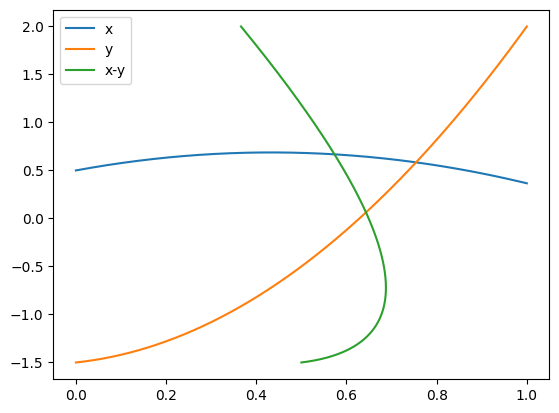

In [530]:
import matplotlib.pyplot as plt
x3, y3 = zip(*pos)
x1, y1 = zip(*tpos)
x2,y2 = zip(*ypos)

# Plot the data from both lists on the same graph.
plt.plot(x1, y1, marker='o', markersize=0.001, linestyle='-', label='x')
plt.plot(x2, y2, marker='o', markersize=0.001, linestyle='-', label='y')
plt.plot(x3, y3, marker='o', markersize=0.001, linestyle='-', label='x-y')

plt.legend()

plt.show()


/var/folders/xx/m4kxh2sd2c1c63v6bkc7c48h0000gn/T/ipykernel_28557/1092182675.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/xx/m4kxh2sd2c1c63v6bkc7c48h0000gn/T/ipykernel_28557/1092182675.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()
/var/folders/xx/m4kxh2sd2c1c63v6bkc7c48h0000gn/T/ipykernel_28557/1092182675.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()


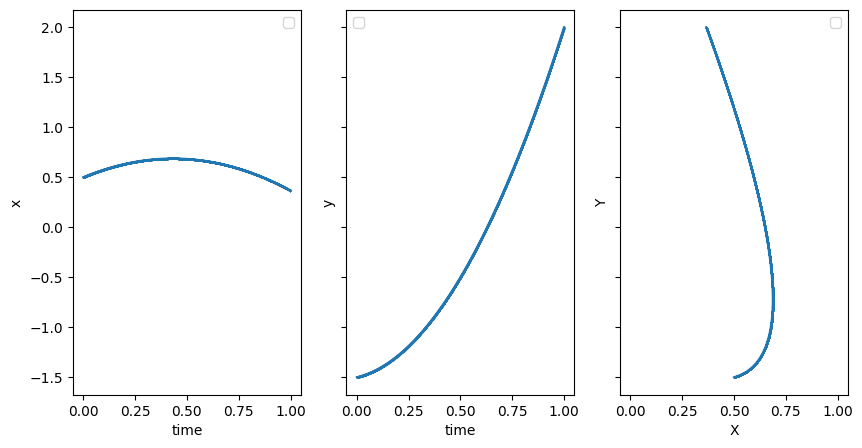

In [531]:
import matplotlib.pyplot as plt


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(10, 5))

ax1.plot(x1, y1, marker='o', linestyle='-', markersize=0.1)
ax1.set_xlabel("time")
ax1.set_ylabel("x")
ax1.legend()

ax2.plot(x2, y2, marker='o', linestyle='-', markersize=0.1)
ax2.set_xlabel("time")
ax2.set_ylabel("y")
ax2.legend()

ax3.plot(x3, y3, marker='s', linestyle='-', markersize=0.2)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.legend()


plt.show()
